<a href="https://colab.research.google.com/github/Lokeshgadhi/introonpandas/blob/main/lokesh%20association%20rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of transactions after cleaning: 5175
Basket shape (transactions × unique products): (5175, 119)


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Found 436 frequent itemsets
After filtering, 0 rules found (conf ≥ 0.5, lift ≥ 3)

Top 10 rules by lift:
Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


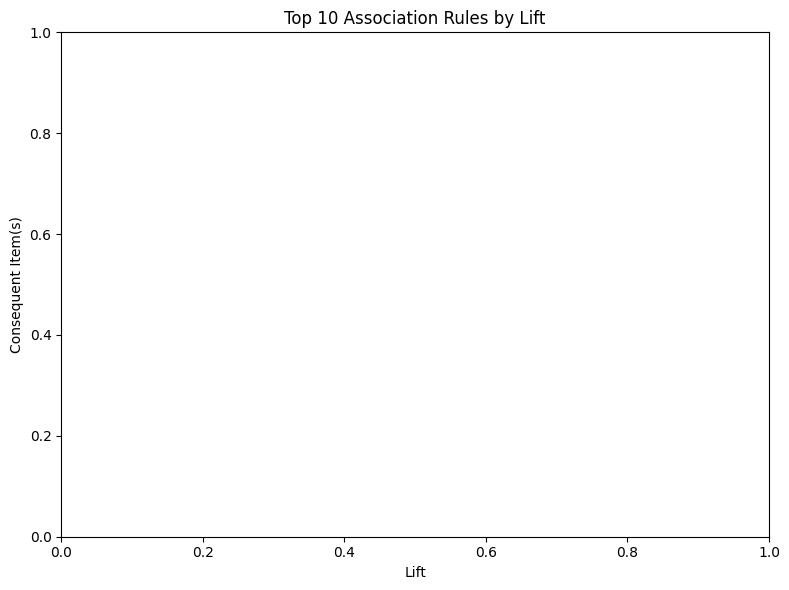

In [9]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the sheet
df = pd.read_excel('Online retail.xlsx', sheet_name='Sheet1')

# 2. Rename the lone column to 'items'
df.columns = ['items']

# 3. Drop missing or empty transactions
df['items'] = df['items'].astype(str).str.strip()  # Ensure no extra spaces
df = df[df['items'] != '']  # Remove empty rows
df.drop_duplicates(inplace=True)  # Remove duplicate transactions

# Print the number of transactions after cleaning
print(f"Number of transactions after cleaning: {len(df)}")

# 4. Clean whitespace around each item and one-hot encode (each item as a column)
def clean_row(item_str):
    # Clean up each item and make sure items are well formatted
    return ','.join(i.strip() for i in item_str.split(',') if i.strip())

df['items'] = df['items'].apply(clean_row)

# Convert the 'items' column into a one-hot encoded DataFrame
basket = df['items'].str.get_dummies(sep=',')

# Print the shape of the basket (transactions × unique products)
print(f"Basket shape (transactions × unique products): {basket.shape}")

# 5. Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Print number of frequent itemsets found
print(f"Found {len(frequent_itemsets)} frequent itemsets")

# 6. Generate association rules from frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Filter the rules by confidence and lift
rules = rules[(rules['confidence'] >= 0.5) & (rules['lift'] >= 3)]

# Print number of rules after filtering
print(f"After filtering, {len(rules)} rules found (conf ≥ 0.5, lift ≥ 3)")

# 7. Show the top 10 rules sorted by lift
top10 = rules.sort_values('lift', ascending=False).head(10)
print("\nTop 10 rules by lift:")
print(top10[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# 8. Plot the top 10 rules by lift
plt.figure(figsize=(8, 6))
sns.barplot(x='lift', y=top10['consequents'].astype(str), data=top10)
plt.title('Top 10 Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Consequent Item(s)')
plt.tight_layout()
plt.show()


Top 20 rules by lift:
                          antecedents                       consequents  \
525                       (olive oil)               (whole wheat pasta)   
524               (whole wheat pasta)                       (olive oil)   
914                            (soup)             (milk, mineral water)   
911             (milk, mineral water)                            (soup)   
396                   (herb & pepper)                     (ground beef)   
397                     (ground beef)                   (herb & pepper)   
855               (frozen vegetables)           (shrimp, mineral water)   
850           (shrimp, mineral water)               (frozen vegetables)   
836                     (ground beef)    (spaghetti, frozen vegetables)   
833    (spaghetti, frozen vegetables)                     (ground beef)   
922                 (spaghetti, milk)                       (olive oil)   
927                       (olive oil)                 (spaghetti, milk)   
834

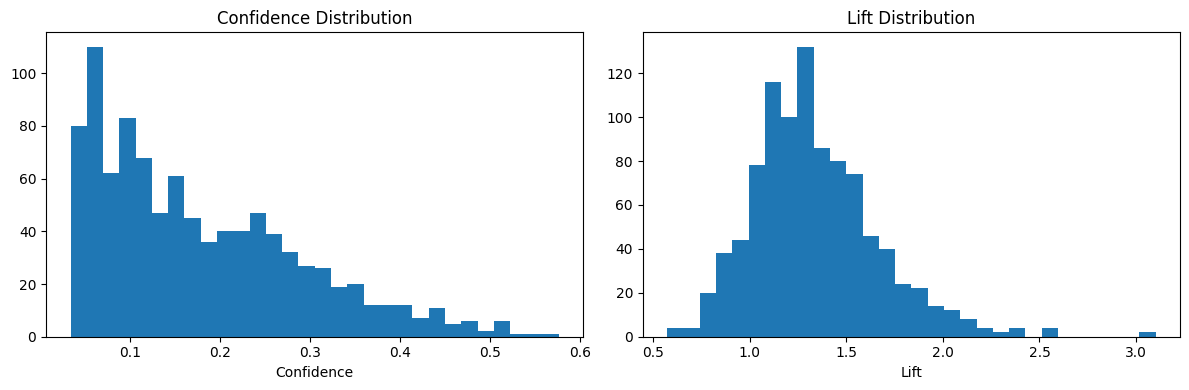

In [10]:
from mlxtend.frequent_patterns import association_rules

# 1. Generate all candidate rules (no threshold on the metric)
all_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0)

# 2. Examine the 20 highest‐lift rules
top_lift = all_rules.sort_values('lift', ascending=False).head(20)
print("Top 20 rules by lift:")
print(top_lift[['antecedents','consequents','support','confidence','lift']])

# 3. Plot distributions
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(all_rules['confidence'], bins=30)
plt.title('Confidence Distribution')
plt.xlabel('Confidence')

plt.subplot(1,2,2)
plt.hist(all_rules['lift'], bins=30)
plt.title('Lift Distribution')
plt.xlabel('Lift')

plt.tight_layout()
plt.show()


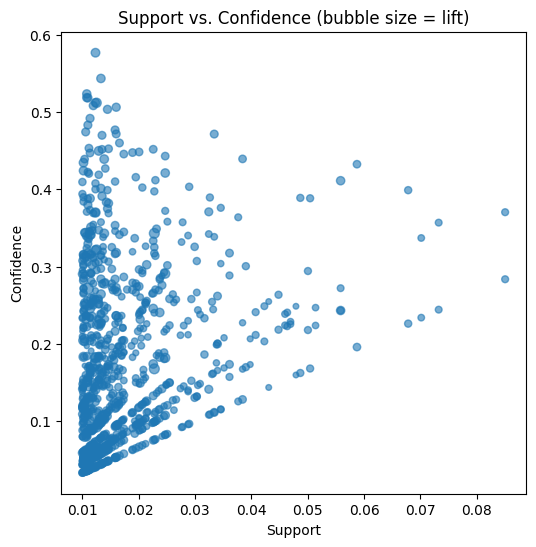

In [11]:
import matplotlib.pyplot as plt

all_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0)
x = all_rules['support']
y = all_rules['confidence']
z = all_rules['lift']

plt.figure(figsize=(6,6))
plt.scatter(x, y, s=z*20, alpha=0.6)  # bubble size ∝ lift
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs. Confidence (bubble size = lift)')
plt.show()


In [12]:
frequent_itemsets = apriori(basket, min_support=0.005, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules = rules[(rules['confidence'] >= 0.3)]
print(f"Filtered to {len(rules)} rules")


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Filtered to 491 rules


In [13]:
# after you build the basket:
basket_bool = basket.astype(bool)

# then:
frequent_itemsets = apriori(basket_bool, min_support=0.005, use_colnames=True)


In [14]:
top_rules = rules.sort_values('lift', ascending=False).head(20)
print(top_rules[['antecedents','consequents','support','confidence','lift']])


                                        antecedents          consequents  \
2415             (whole wheat pasta, mineral water)          (olive oil)   
610                                         (pasta)             (shrimp)   
1280                     (chocolate, herb & pepper)        (ground beef)   
2086                     (spaghetti, herb & pepper)        (ground beef)   
1036                           (chicken, olive oil)               (milk)   
1912                      (soup, frozen vegetables)               (milk)   
2074                          (milk, herb & pepper)        (ground beef)   
2081                 (herb & pepper, mineral water)        (ground beef)   
467                                  (tomato sauce)        (ground beef)   
1994                             (shrimp, tomatoes)  (frozen vegetables)   
2748  (spaghetti, frozen vegetables, mineral water)        (ground beef)   
2373                 (whole wheat pasta, spaghetti)               (milk)   
2518        

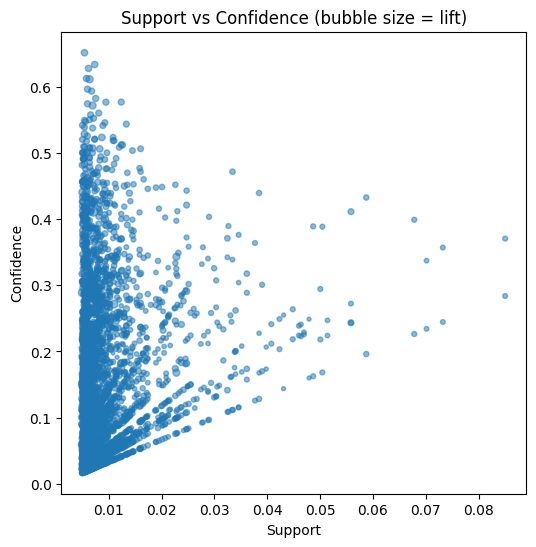

In [15]:
import matplotlib.pyplot as plt

all_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0)
plt.figure(figsize=(6,6))
plt.scatter(all_rules['support'],
            all_rules['confidence'],
            s=all_rules['lift']*10,
            alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence (bubble size = lift)')
plt.show()


In [16]:
rules.to_csv('all_association_rules.csv', index=False)


1.	What is lift and why is it important in Association rules?

**Lift** is a measure of how much more often two items (or itemsets) $A$ and $B$ occur together than you would expect if they were statistically independent.

---

## Definition

$$
\text{lift}(A \Rightarrow B)
\;=\;
\frac{\displaystyle\text{support}(A \cup B)}{\displaystyle\text{support}(A)\;\times\;\text{support}(B)}
$$

* **support**($A \cup B$) = fraction of transactions containing both $A$ and $B$.
* **support**($A$), **support**($B$) = fractions containing $A$ and $B$ individually.

---

## Interpretation

* **lift > 1**
  – $A$ and $B$ occur together **more often** than if they were independent → a **positive association**.
* **lift = 1**
  – Occurrence of $A$ has **no effect** on occurrence of $B$ → **independent**.
* **lift < 1**
  – $A$ and $B$ co‑occur **less often** than expected → a **negative association** (they repel).

---

## Why Lift Matters

1. **Filters out spurious rules**

   * High support and confidence alone can surface trivial pairs (e.g. very common items).
   * Lift highlights *unexpected* associations, focusing attention on pairs that truly “surprise” relative to baseline frequencies.
2. **Quantifies strength of association**

   * Goes beyond confidence—which can be misleading when consequents are very frequent—by normalizing against overall occurrence rates.
3. **Guides action**

   * Rules with high lift suggest pairings ripe for cross‑sell, bundling, or promotional placement, because they represent *stronger-than‑chance* co‑purchases.




2.	What is support and Confidence. How do you calculate them?

**Support** and **confidence** are the two foundational metrics in association rule mining. They quantify, respectively, how frequently items occur together in your dataset and how reliably one item predicts another.

---

## 1. Support

* **Definition**
  The support of an itemset $X$ is the proportion of all transactions in which $X$ appears.
* **Formula**

  $$
    \mathrm{support}(X)
    \;=\;
    \frac{\#\{\text{transactions containing }X\}}
         {\#\{\text{total transactions}\}}
  $$
* **Rule Support**
  For a rule $A \Rightarrow B$, we often report

  $$
    \mathrm{support}(A \cup B)
    \;=\;
    \frac{\#\{\text{transactions containing both }A\text{ and }B\}}
         {\#\{\text{total transactions}\}}
  $$
* **Interpretation**

  * A support of 0.02 (2%) means that 2% of all baskets contain that itemset.
  * Higher support → more common pattern.

---

## 2. Confidence

* **Definition**
  The confidence of a rule $A \Rightarrow B$ is the conditional probability that a basket contains $B$ given that it contains $A$.
* **Formula**

  $$
    \mathrm{confidence}(A \Rightarrow B)
    \;=\;
    \frac{\mathrm{support}(A \cup B)}
         {\mathrm{support}(A)}
    =
    P(B \mid A)
  $$
* **Interpretation**

  * A confidence of 0.60 means “60% of the time that $A$ appears in a transaction, $B$ also appears.”
  * High confidence → strong predictive power of $A$ for $B$.
  * Note: Confidence alone can be misleading if $B$ is very common—hence the need for **lift** to normalize.

---

### Quick Example

Suppose you have 1,000 transactions:

| Transaction ID | Items Bought        |
| -------------- | ------------------- |
| 1              | {milk, bread, eggs} |
| 2              | {bread, butter}     |
| …              | …                   |
| 50             | {milk, bread}       |
| …              | …                   |

* Let $A =\{\text{milk}\}, B =\{\text{bread}\}$.
* If “milk” appears in 200 transactions,

  $$
    \mathrm{support}(A)=200/1000=0.20.
  $$
* If “milk and bread” appear together in 50 transactions,

  $$
    \mathrm{support}(A\cup B)=50/1000=0.05.
  $$
* Then

  $$
    \mathrm{confidence}(A\Rightarrow B)
    =\frac{0.05}{0.20}=0.25,
  $$

  meaning 25% of milk‑buying transactions also include bread.




3.	What are some limitations or challenges of Association rules mining?

While **Association Rule Mining (ARM)** is a powerful technique for discovering relationships within data, it does come with several limitations and challenges. Here are some of the key issues:

### 1. **High Computational Complexity**

* **Challenge**: Association rule mining, especially using algorithms like **Apriori**, can become very computationally expensive as the dataset grows in size, especially with large numbers of items (high dimensionality) or a high number of transactions.
* **Why**: The algorithm explores all possible item combinations (itemsets), which increases exponentially with more items and larger datasets.
* **Solution**: Using techniques like **FP-growth** (which doesn't generate candidate itemsets) or applying **dimensionality reduction** (e.g., PCA) before mining can help manage this issue.

### 2. **Too Many Rules Generated**

* **Challenge**: The algorithm can generate a huge number of rules, many of which are **redundant**, **trivial**, or **uninteresting**.
* **Why**: Even when applying thresholds for **support**, **confidence**, and **lift**, there's no guarantee that the resulting rules are valuable or actionable.
* **Solution**: Post-processing methods such as **rule pruning** and **filtering** based on domain knowledge or more sophisticated metrics like **conviction** or **leverage** can help reduce rule bloat.

### 3. **Difficulty in Handling Continuous Data**

* **Challenge**: Association rules are typically based on categorical data, while many real-world datasets contain continuous variables (e.g., prices, age, etc.).
* **Why**: Continuous values don’t directly fit the typical discrete nature of itemsets in ARM.
* **Solution**: Preprocessing techniques like **binning** (converting continuous data into categorical intervals) or using **quantile-based discretization** can convert continuous data into forms that ARM can handle.

### 4. **Difficulty with Rare Items**

* **Challenge**: Rare items or infrequent itemsets may not be captured effectively due to **low support**.
* **Why**: Association rule mining focuses on frequent itemsets, so rare but potentially interesting relationships may be overlooked.
* **Solution**: Adjusting the **support threshold** or using algorithms specifically designed to handle **rare itemsets** or **long tail distributions** (like **Rare Itemset Mining**) can help address this limitation.

### 5. **Lack of Contextual Interpretation**

* **Challenge**: The generated rules do not provide direct insights into **why** certain associations occur.
* **Why**: ARM is a statistical technique that finds correlations, but it doesn't model or explain causal relationships.
* **Solution**: Domain knowledge is essential to interpret and validate the rules. In addition, **causal inference methods** or **contextual constraints** can be used in conjunction with ARM to provide more meaningful insights.

### 6. **Difficulty in Evaluating Rule Quality**

* **Challenge**: While **support**, **confidence**, and **lift** provide basic metrics, they do not always capture **rule quality** in the real world.
* **Why**: Some rules with high **lift** or **confidence** might not be practically useful or might represent patterns with no real-world significance.
* **Solution**: Additional measures such as **conviction**, **leverage**, or **interest** can provide deeper insights into the strength and significance of the rules.

### 7. **Overfitting or Over-Specification**

* **Challenge**: When thresholds for support, confidence, and lift are set too low, it can lead to **overfitting** where the model captures many spurious relationships that do not generalize well.
* **Why**: With a low threshold, the algorithm may generate many rules that are statistically significant but not meaningful or actionable.
* **Solution**: Careful tuning of thresholds and the use of **cross-validation** or **testing on a validation set** can mitigate overfitting.

### 8. **Interpretability Issues with Complex Rules**

* **Challenge**: As the number of items or features grows, the resulting rules may become harder to interpret.
* **Why**: Complex rules with many items or deep hierarchies can be hard to understand and apply to business decisions.
* **Solution**: Limiting the **length** of rules or focusing on **simpler, more interpretable rules** can make the results more actionable. Using **visualization techniques** to represent associations can also help improve interpretability.

### 9. **Static Nature of Association Rules**

* **Challenge**: Association rules are generated based on **historical data**, so they reflect past patterns but do not adapt to changes in customer behavior or new trends.
* **Why**: In dynamic environments, customer preferences and purchasing behaviors change over time.
* **Solution**: Periodically retraining the model and updating rules can help keep the system relevant. Additionally, **incremental learning** or **online learning** techniques can be applied to handle evolving data.

### 10. **Assumption of Transaction Independence**

* **Challenge**: Association rules assume that transactions are independent, but this may not hold in real-world scenarios (e.g., customers buying products as part of recurring shopping habits or seasonal trends).
* **Why**: In reality, transactions may be related due to external factors such as promotions, seasonality, or customer demographics.
* **Solution**: Incorporating **time-based or context-based association rule mining** can help account for dependencies between transactions.



